In [7]:
import numpy as np
import pandas as pd
import sys
import os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))
from src.curve_fit import fit,fitted
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../data/ice-motor-eff.csv")
df.head()
# for col in df.columns:
#     df[col] = df[col]-df[col].min()
#     df[col] = df[col]/df[col].max()
# df.to_csv('../data/ice-motor-eff.csv',index=False)

,torqueX,torqueY,powerX,powerY
0,0.000000,0.374170,0.000000,0.000000
1,0.051985,0.487813,0.034015,0.070339
2,0.103981,0.590544,0.065757,0.138773
3,0.155992,0.680998,0.099784,0.202293
4,0.208020,0.755994,0.138365,0.264887


In [9]:
df = pd.read_csv("../data/electric-motor-eff.csv")
data = {}
for col in df.columns:
    arr = np.array(df[col])
    arr = arr[~np.isnan(arr)]
    data[col]= arr

Generate fit params

In [10]:
params = {}
fns = {}
metrics = ["efficiency"]
for metric in metrics:
    params[metric], fns[metric] = fit(data[f"{metric}X"],data[f"{metric}Y"],mode='all')

Plot results

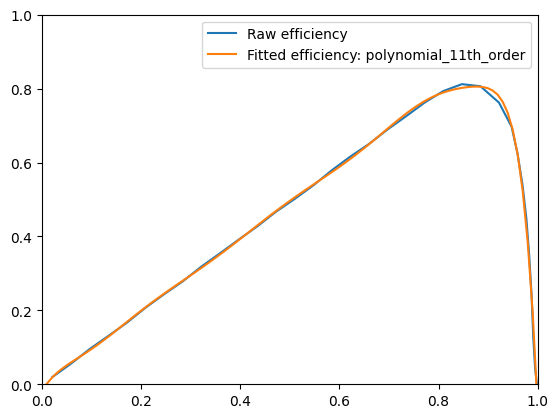

In [11]:
plt.figure()
x = np.linspace(0,1,100)
for metric in metrics:
    y = fitted(x,params[metric],fns[metric])
    plt.plot(data[f"{metric}X"],data[f"{metric}Y"],label=f"Raw {metric}")
    plt.plot(x,y,label=f"Fitted {metric}: {fns[metric].__name__}")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()